In [59]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
df_10_20 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-10-20.csv").dropna()
df_10_27 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-10-27.csv").dropna()
df_11_03 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-03.csv").dropna()
df_11_10 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-10.csv").dropna()
df_11_17 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-17.csv").dropna()
df_11_22 = pd.read_csv("../data/Spreadsheet/Lettuce/2017-11-22.csv").dropna()

In [18]:
def preprocess_spectra(df):
    return average_dataframe(df, 15).drop("Wavelengths", 1).as_matrix().transpose()

def average_dataframe(df, n):
    # Separate label column from data
    label = df.iloc[:,0]
    df = df.iloc[:,1:]

    if (df.shape[1]) % n != 0:
        raise Exception("Number of columns: {}. Not divisible by {}.".format(df.shape[1], n))

    # Average every N columns
    average_df = pd.DataFrame()
    average_df["Wavelengths"] = label
    for i in range((df.shape[1]) // n):
        average_df[i] = df.iloc[:,i*n:(i+1)*n].mean(axis=1)

    return average_df

In [30]:
spectra_10_20 = np.delete(preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-10-20.csv")), list(range(1, 96, 2)), axis=0)
spectra_10_27 = np.delete(preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-10-27.csv")), list(range(1, 96, 2)), axis=0)
spectra_11_03 = np.delete(preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-11-03.csv")), list(range(1, 96, 2)), axis=0)
spectra_11_10 = np.delete(preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-11-10.csv")), list(range(1, 96, 2)), axis=0)
spectra_11_17 = np.delete(preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-11-17.csv")), list(range(1, 96, 2)), axis=0)
spectra_11_22 = np.delete(preprocess_spectra(pd.read_csv("../data/Unprocessed/2017-11-22.csv")), list(range(1, 96, 2)), axis=0)

In [31]:
print(spectra_10_20.shape)
print(spectra_10_27.shape)
print(spectra_11_03.shape)
print(spectra_11_10.shape)
print(spectra_11_17.shape)
print(spectra_11_22.shape)

(48, 751)
(48, 751)
(48, 751)
(48, 751)
(48, 751)
(48, 751)


In [44]:
spectra = np.concatenate([spectra_10_20, spectra_10_27, spectra_11_03, spectra_11_10, spectra_11_17, spectra_11_22], axis=0)
wp = np.concatenate([df_10_20["WP"].values, df_10_27["WP"].values, df_11_03["WP"].values, df_11_10["WP"].values, df_11_17["WP"].values, df_11_22["WP"].values], axis=0)

In [45]:
spectra.shape, wp.shape

((288, 751), (288,))

# Train Predictor

In [60]:
X_train, X_valid, y_train, y_valid = train_test_split(spectra, wp, test_size=0.15)

In [66]:
from sklearn.linear_model import LinearRegression, Lasso
reg = LinearRegression()
reg.fit(X_train, y_train)
print(mean_absolute_error(reg.predict(X_train), y_train))
print(mean_absolute_error(reg.predict(X_valid), y_valid))

5.27271532447e-13
3.08908611094


In [67]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=500)
mlp.fit(X_train, y_train)
print(mean_absolute_error(mlp.predict(X_train), y_train))
print(mean_absolute_error(mlp.predict(X_valid), y_valid))

0.986754427273
1.31905782465


1.4696715784865375

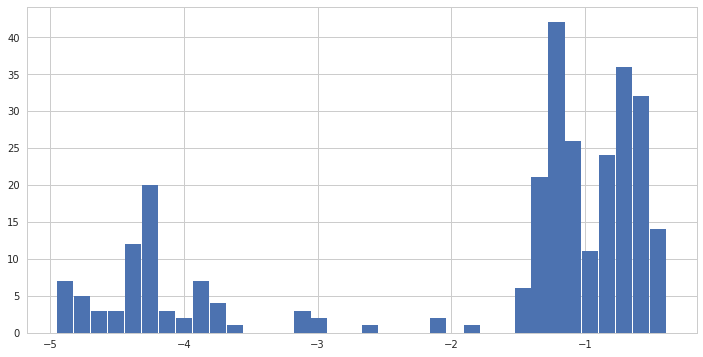

In [68]:
plt.hist(wp, 36, rwidth=0.95)
np.std(wp)

# Correlation with 970nm

In [84]:
wbi = spectra[:, 900-325] / spectra[:, 970-325]

In [82]:
stats.pearsonr(wbi, wp)

(-0.0064921844824051399, 0.912648864667437)